### 실습문제01

1. 야후에서 신라젠의 주가 데이터를 가져온다.
    - 2014년부터 가져온다.
2. 종가에 대한 그래프를 그리고,
    - 250일, 60일, 20일 이동평균선을 그린다.
3. 20일과 60일 이동 표준편차를 그린다.

- pandas_datareader.data. get_data_yahoo
- get_data_yahoo(name, start=None, end=None, ...)
- 종목코드인 name을 입력하는 방법:
- 코스피: 종목코드.KS
- 코스닥: 종목코드.KQ
- 신라젠: 215600.KQ

In [16]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14, 8))

### 1. 데이터 불러오기

In [21]:
import pandas_datareader as pdr
silla = pdr.get_data_yahoo('215600.KQ', '2014-01-01').Close
silla.head()

Date
2016-12-06    12850.0
2016-12-08    11200.0
2016-12-09    11900.0
2016-12-12    11550.0
2016-12-14    12950.0
Name: Close, dtype: float64

### 2. 이동평균식

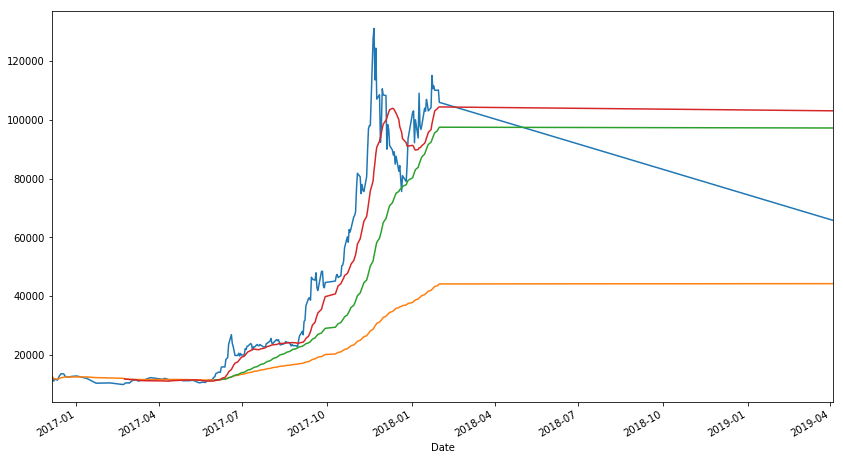

In [25]:
silla.plot()
ma250 = silla.rolling(250, min_periods=0).mean()
ma60 = silla.rolling(60, min_periods=0).mean()
ma20 = silla.rolling(20, min_periods=0).mean()

plt.plot(ma250)
plt.plot(ma60)
plt.plot(ma20)

### 3. 표준편차 추가

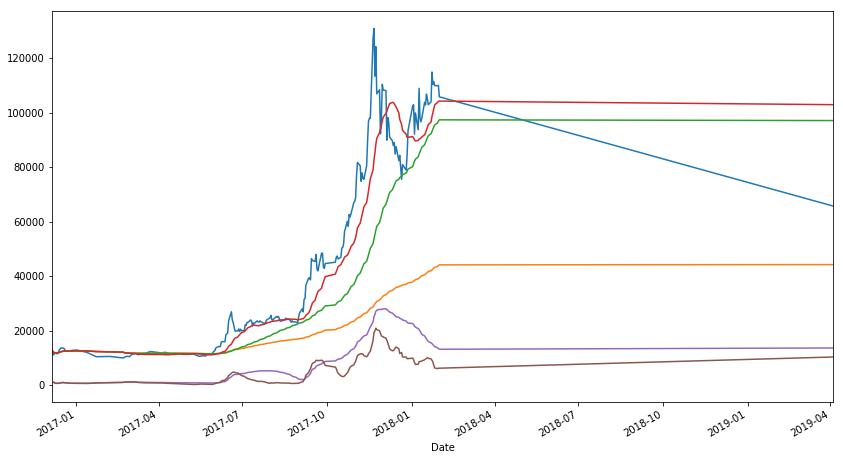

In [28]:
silla.plot()
ma250 = silla.rolling(250, min_periods=0).mean()
ma60 = silla.rolling(60, min_periods=0).mean()
ma20 = silla.rolling(20, min_periods=0).mean()

ma60_std = silla.rolling(60, min_periods=0).std()
ma20_std = silla.rolling(20, min_periods=0).std()
plt.plot(ma250)
plt.plot(ma60)
plt.plot(ma20)
plt.plot(ma60_std)
plt.plot(ma20_std)

___
### 참고
- rolling에서 함수 바로 돌리지말고 window 객체 만들어 놓고 따로 함수 적용할 것.
    - ex) ma250 = silla.rolling(250)
    - ma250.mean().plot() 

- 범례 만들기. axes.legend(['name1', 'name2', 'name3', 'name4'])
- 제목 만들기. axes.set_title